In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


... loading data
(1, 1, 28, 28)
(1, 20, 12, 12)
(1, 50, 4, 4)
(1, 800)
(1, 500)
(1,)
[7]


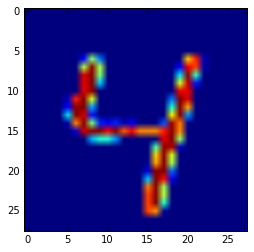

In [7]:
import six.moves.cPickle as pickle
import os
import sys
import timeit

import numpy

import theano
import theano.tensor as T
from theano.tensor.signal import downsample
from theano.tensor.nnet import conv2d

from logistic_sgd import LogisticRegression, load_data
from convolutional_mlp import LeNetConvPoolLayer 
from mlp import HiddenLayer

import mstone


layer0 = pickle.load(open('%s/best_model_cnn_l0.pkl'%mstone.theano_path))
layer1 = pickle.load(open('%s/best_model_cnn_l1.pkl'%mstone.theano_path))
layer2 = pickle.load(open('%s/best_model_cnn_l2.pkl'%mstone.theano_path))
layer3 = pickle.load(open('%s/best_model_cnn_l3.pkl'%mstone.theano_path))


layer0_model = theano.function(
    inputs=[layer0.input],
    outputs=layer0.output)

layer1_model = theano.function(
    inputs=[layer1.input],
    outputs=layer1.output)

layer2_model = theano.function(
    inputs=[layer2.input],
    outputs=layer2.output)

layer3_model = theano.function(
    inputs=[layer3.input],
    outputs=layer3.y_pred)


dataset='mnist.pkl.gz'
datasets = load_data(dataset)
test_set_x, test_set_y = datasets[2]
test_set_x = test_set_x.get_value()

#input_test = test_set_x[10].reshape((1,1,28,28))
input_test = test_set_x[210].reshape((1,1,28,28))
print input_test.shape
#predicted_values = predict_model(test_set_x[:10])
#print(predicted_values)
data_l0 = layer0_model(input_test)
print data_l0.shape
data_l1 = layer1_model(data_l0)
print data_l1.shape

data_l2_in = data_l1.flatten(2)
data_l2_in = data_l2_in.reshape(1,800)
print data_l2_in.shape
#print data_l2_in.shape
#data_l2 = layer2_model(data_l1)
data_l2 = layer2_model(data_l2_in)
print data_l2.shape
data_l3 = layer3_model(data_l2)
print data_l3.shape
print data_l3
#print dir(test_set_y.owner.inputs[0].owner.inputs[0])
#sy = test_set_y.owner.inputs[0].owner.inputs[0].get_value()
pylab.imshow(input_test[0][0])
#print sy[210]

#print data_l1.shape